# **Apple Quality Prediction**

##### Walter Sostene Losa (walter.losa@student.supsi.ch)
##### Filippo Finke (filippo.finke@student.supsi.ch)

Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality

### Project goal

the goal of this project is to predict the quality of an apple based on its features. The dataset contains 7 features and a target variable. The target variable is the quality of the apple.


### 1. Dataset loading

in this section we load the dataset and we show the basic information about it.

#### 1.1 Importing libraries

In [2]:
# Importing the libraries used in the project
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import umap
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

/Users/filippofinke/.pyenv/versions/3.11.3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 1.2 Loading the dataset

In [3]:
# Read the dataset
df = pd.read_csv('apple_quality.csv')

#### 1.3 Dataset head

In [4]:
# Display the first 5 rows of the dataset
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


#### 1.4 Dataset description

In [5]:
# Descriptive statistics of the dataset
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


### 2. Data preprocessing

in this section we preprocess the dataset, we check for missing values and we encode the categorical features.

#### 2.1 Print and remove null values

In [6]:
#Checking for missing values and remove them
print(df.isnull().sum())

# Drop the missing values
df = df.dropna()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64


#### 2.2 Print and remove duplicates

In [7]:
#Checking for duplicates
print(df.duplicated().sum())

# Drop the duplicates
df = df.drop_duplicates()

0


#### 2.3 Print the dataset shape

In [8]:
# Display the shape of the dataset
df.shape

(4000, 9)

#### 2.4 Print dataset types

In [9]:
# Display the columns of the dataset
df.dtypes

A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality         object
dtype: object

#### 2.5 Drop the 'A_id' column

we drop the 'A_id' column because it is not useful for the prediction.

In [10]:
# Drop the 'A_id' column
df = df.drop('A_id', axis=1)

#### 2.6 Map the 'quality' column

we map the 'quality' column to a binary value, 0 for 'bad' and 1 for 'good'.

In [11]:
# Mapping the 'Quality' column to 1 and 0

df['Quality'] = df['Quality'].map({'good': 1, 'bad': 0})
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity         object
Quality          int64
dtype: object

### 3. Data analisys

In this section we analyze the datasets in order to have a better understanding of the data.


#### 3.1 Print the distribution of target variable

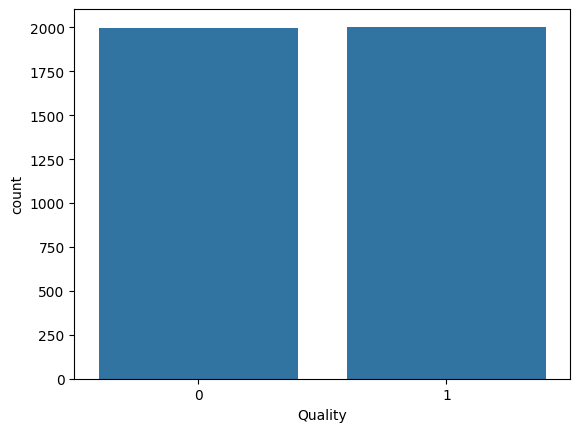

Quality
1    2004
0    1996
Name: count, dtype: int64

In [12]:
# See distribution of target variable
sns.countplot(x='Quality', data=df)
plt.show()

# Display the amount of each class in the 'Quality' column
df['Quality'].value_counts()

#### 3.2 Print the correlation matrix

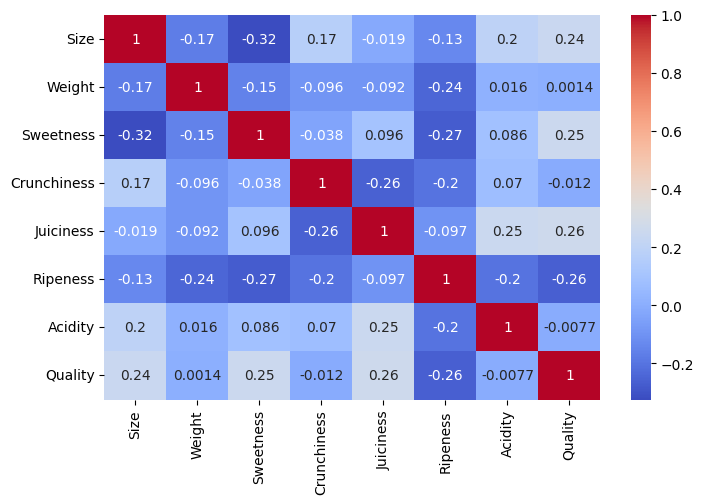

In [13]:
# Print the correlation matrix
corr = df.corr()
plt.figure(figsize=(8, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#### 3.3 Pairplot with the target variable

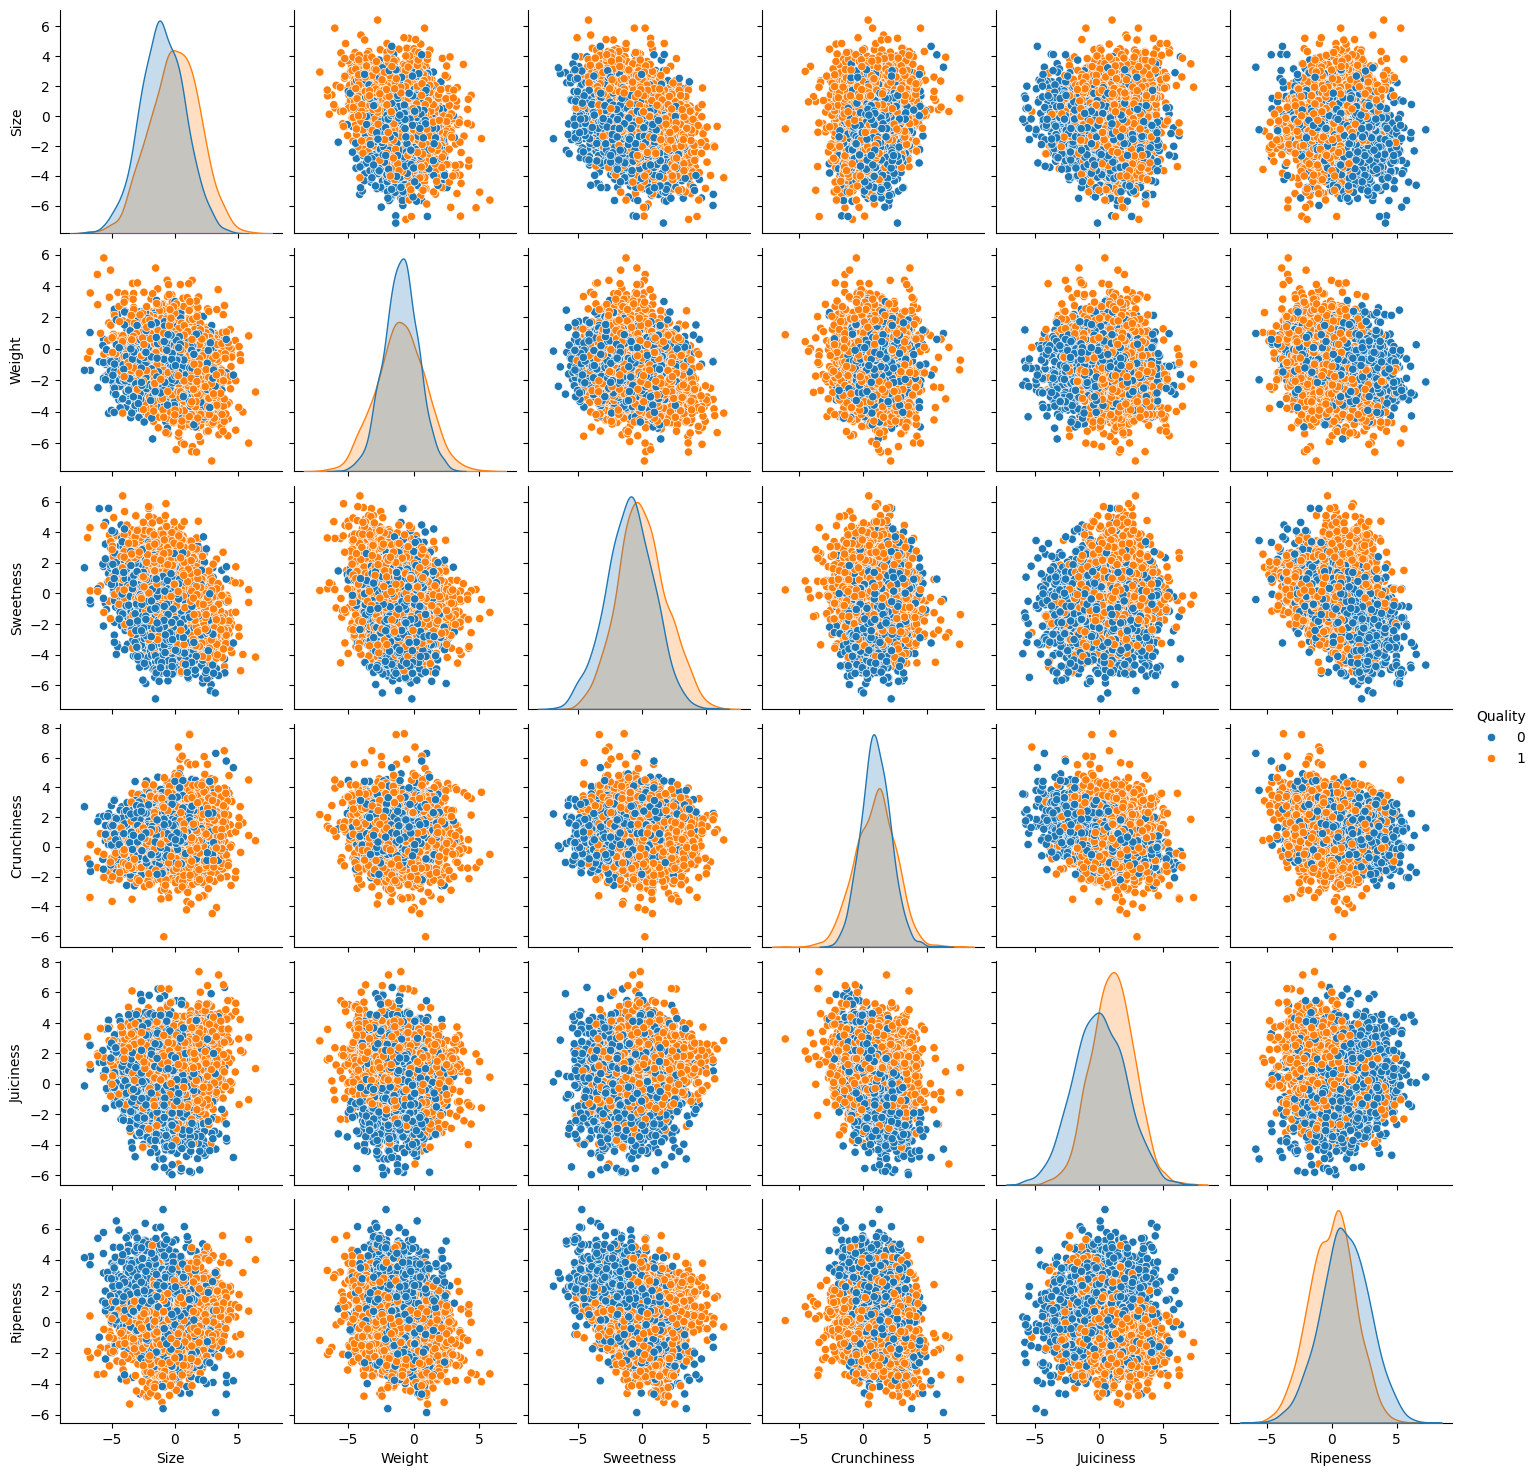

In [14]:
# Pairplot with target variable
sns.pairplot(df, hue='Quality')
plt.show()

#### 3.4 Distribution of the features by the target variable

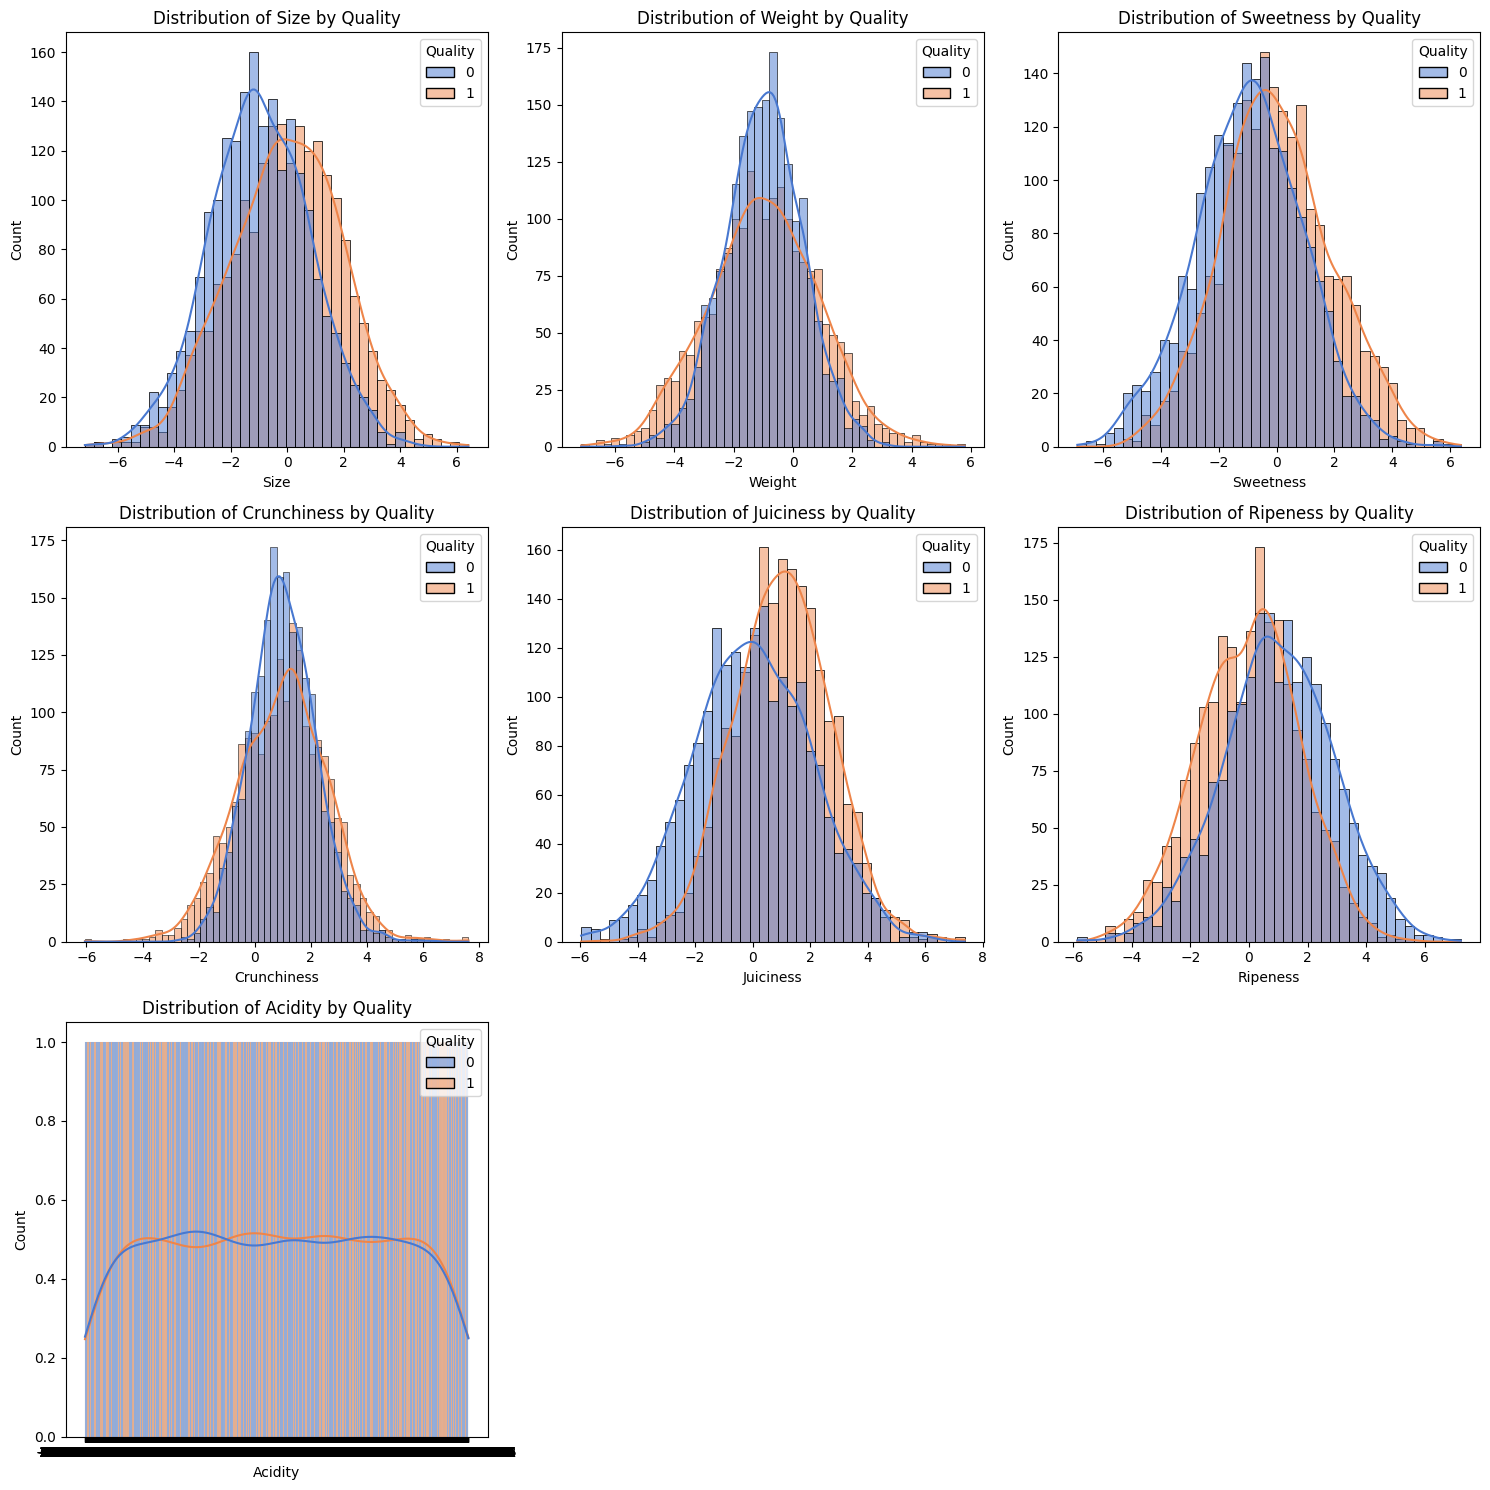

In [15]:
# Print the distribution of each feature by the target variable

features = df.columns[:-1] 
num_features = len(features)
num_plots_per_row = 3
num_rows = (num_features + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.histplot(data=df, x=feature, hue='Quality', kde=True, palette='muted', ax=ax)
    ax.set_title(f'Distribution of {feature} by Quality')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')

for j in range(num_features, num_rows * num_plots_per_row):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### 3.5 Boxplot of the features by the target variable

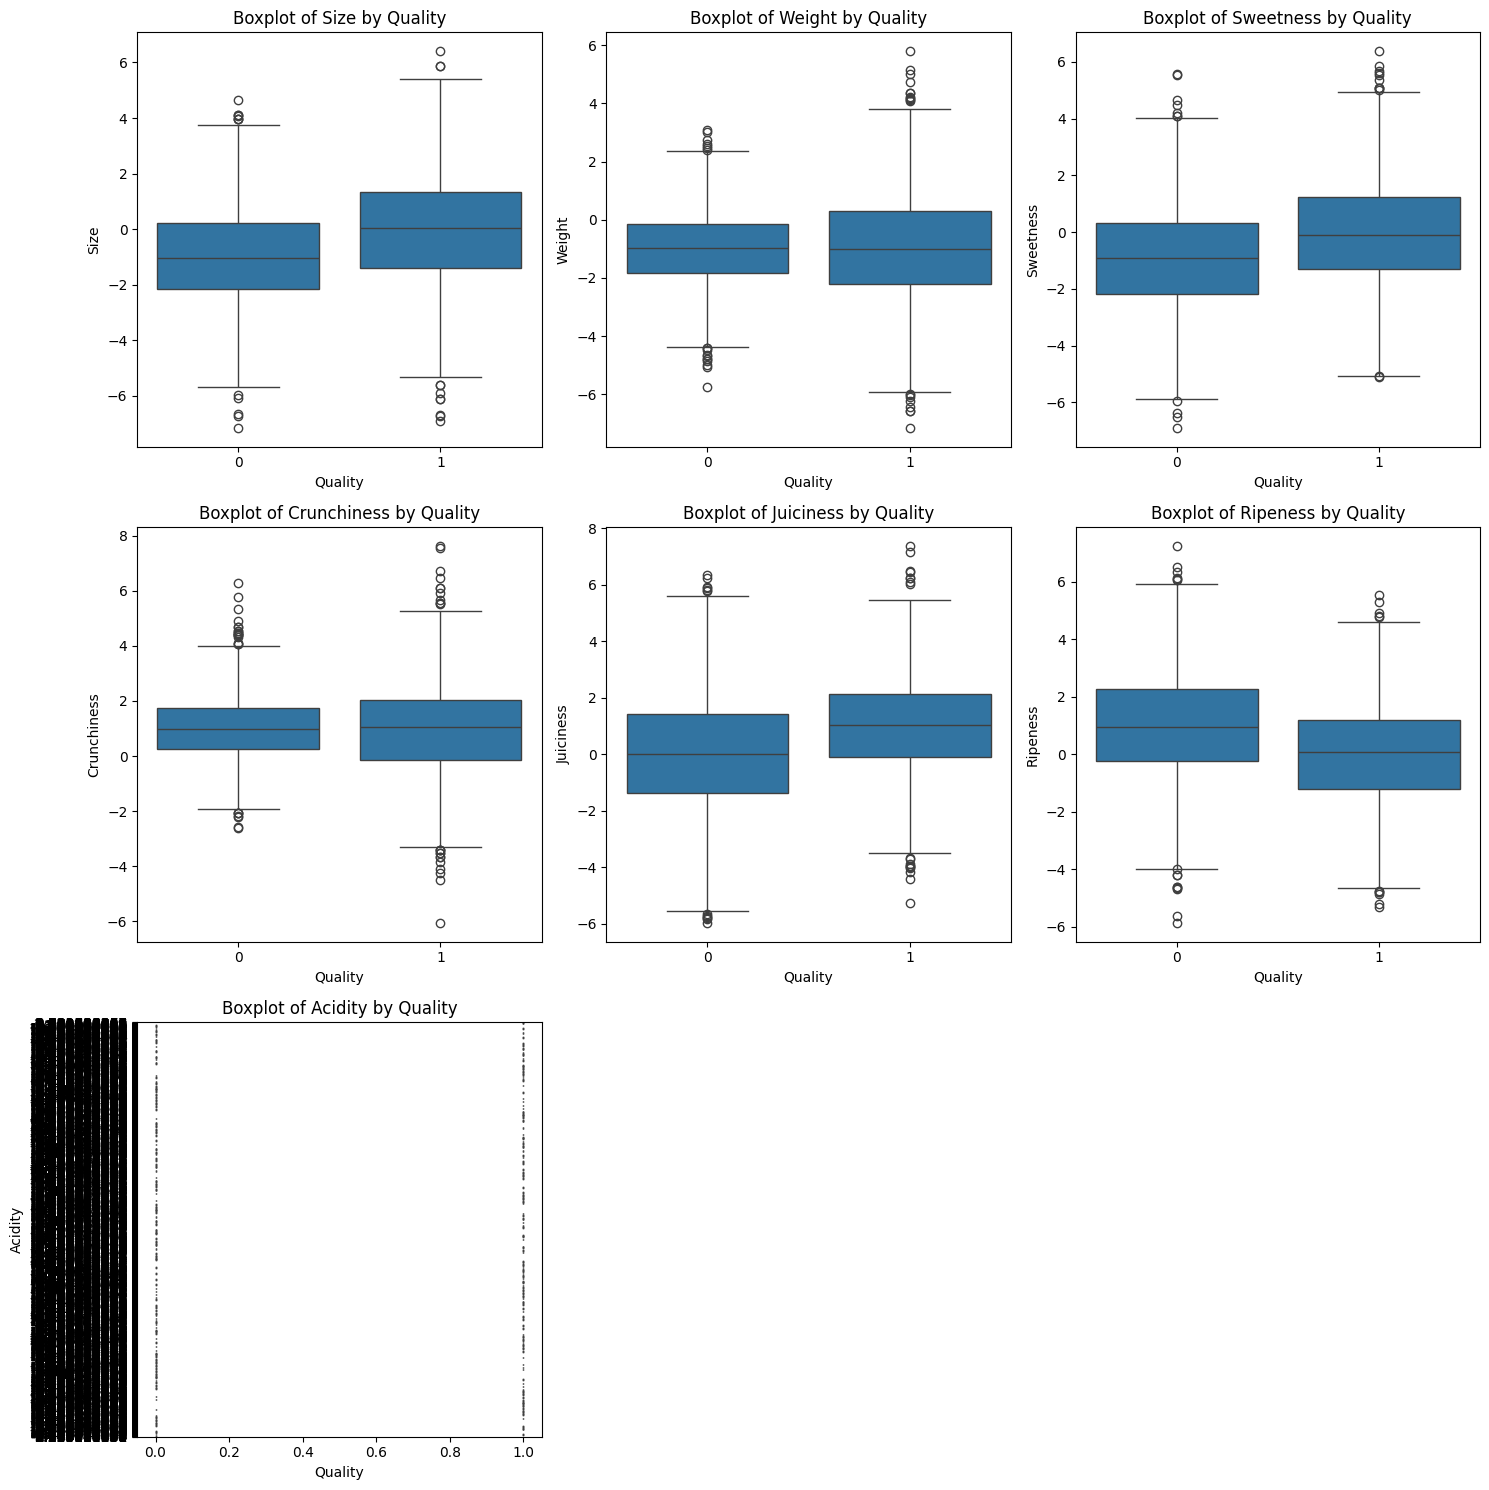

In [16]:
# Print the boxplot of each feature by the target variable

features = df.columns[:-1] 
num_features = len(features)
num_plots_per_row = 3
num_rows = (num_features + num_plots_per_row - 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxplot(x='Quality', y=feature, data=df, ax=ax)
    ax.set_title(f'Boxplot of {feature} by Quality')
    ax.set_xlabel('Quality')
    ax.set_ylabel(feature)

# Remove any unused subplots
for j in range(num_features, num_rows * num_plots_per_row):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 4. Model training

In this section we train the model using different algorithms and we evaluate the performance of each one.

#### 4.1 Scale and split the dataset

we scale the dataset and we split it into training and testing set.

In [17]:
# Scale dataset but not the target variable "Quality"
scaler = StandardScaler()
df_scaled = df.copy()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

# Show the first 5 rows of the scaled dataset
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-1.798424,-0.950373,2.993421,-1.424150,0.690545,-0.089872,-0.269415,1
1,-0.359060,-1.154404,2.127698,0.429746,0.176767,0.197020,-0.378997,1
2,0.109445,-0.225759,-0.652507,-0.946892,1.205422,-0.286156,1.206044,0
3,-0.079977,-0.800146,0.923916,-0.772399,1.619575,-2.087320,0.338315,1
4,0.968573,-0.191640,0.044164,-1.096894,1.305025,-0.961548,0.201472,1


In [18]:
# Split the dataset into features and target variable
X = df.drop('Quality', axis=1)
y = df['Quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3200, 7), (800, 7), (3200,), (800,))

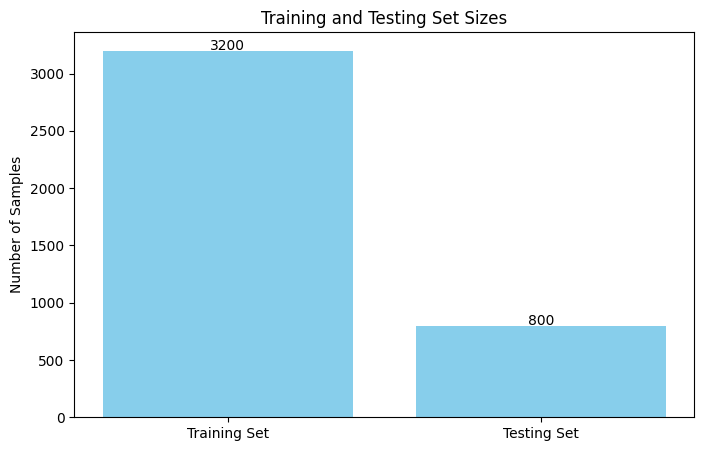

In [19]:
# Show the size of the training and testing sets
plt.figure(figsize=(8, 5))
plt.bar(['Training Set', 'Testing Set'], [len(y_train), len(y_test)], color='skyblue')
plt.ylabel('Number of Samples')
plt.title('Training and Testing Set Sizes')
plt.text(0, len(y_train) + 10, len(y_train), ha='center')
plt.text(1, len(y_test) + 10, len(y_test), ha='center')
plt.show()

#### 4.2 Random Forest Classifier

we select the features using the Random Forest Classifier.

In [20]:
# Select features using random forest classifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)

# Print the feature importances
feature_importances

,importance
Size,0.168373
Ripeness,0.166679
Juiciness,0.160597
Sweetness,0.154411
Acidity,0.125558
Weight,0.113648
Crunchiness,0.110735


#### 4.3 Show feature importances

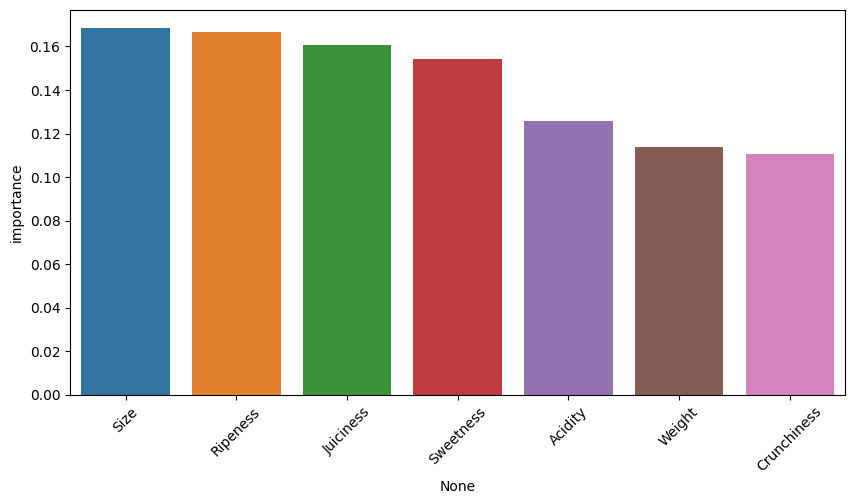

In [21]:
# Plot feature importances 
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances.index, y=feature_importances['importance'], hue=feature_importances.index)
plt.xticks(rotation=45)
plt.show()

#### 4.4 UMAP

In [22]:
# UMAP visualization

reducer = umap.UMAP()
X_train_umap = reducer.fit_transform(X_train)


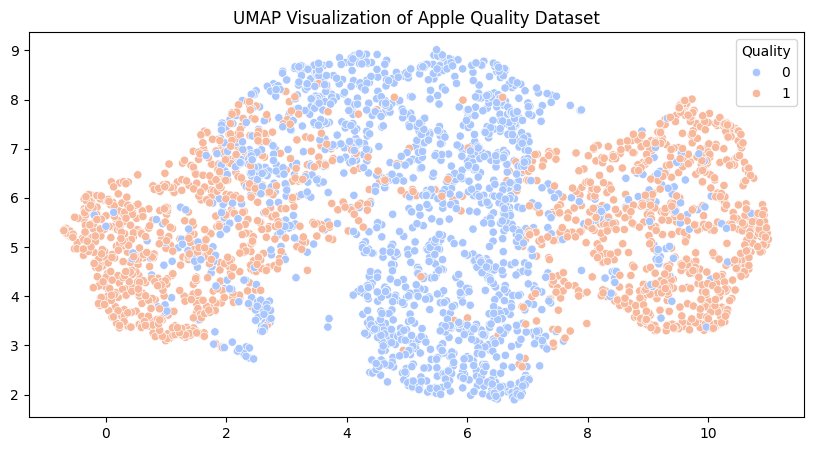

In [23]:
# Plot the UMAP visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_train_umap[:, 0], y=X_train_umap[:, 1], hue=y_train, palette='coolwarm')
plt.title('UMAP Visualization of Apple Quality Dataset')
plt.show()

#### 4.5 k-NN

Best k value: 13
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       387
           1       0.91      0.90      0.91       413

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



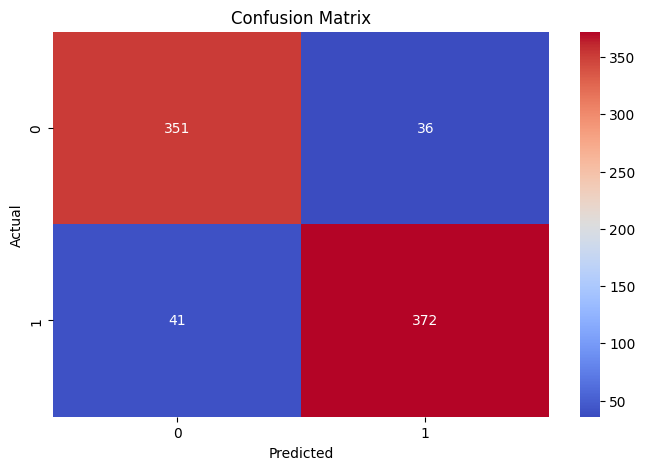

In [24]:
# Parameter grid for k-NN
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# Grid search for k-NN
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)

# Get the best k-NN classifier
best_knn = knn_grid_search.best_estimator_

# Print the best k value
print(f'Best k value: {best_knn.n_neighbors}')

# Predict using the best k-NN classifier
y_pred = best_knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### 4.6 Random Forest

Best parameters: {'max_depth': 20, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       387
           1       0.88      0.90      0.89       413

    accuracy                           0.89       800
   macro avg       0.89      0.88      0.88       800
weighted avg       0.89      0.89      0.88       800



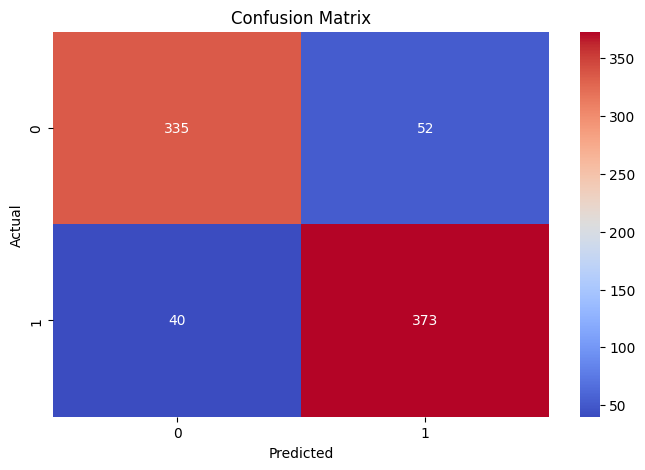

In [25]:
# Parameter grid for Random Forest
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [15, 20, 25]}

# Grid search for Random Forest
rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

rf_grid_search.fit(X_train, y_train)

# Get the best Random Forest classifier
best_rf = rf_grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters: {rf_grid_search.best_params_}')

# Predict using the best Random Forest classifier
y_pred = best_rf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 4.7 SVC

Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       387
           1       0.93      0.92      0.92       413

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



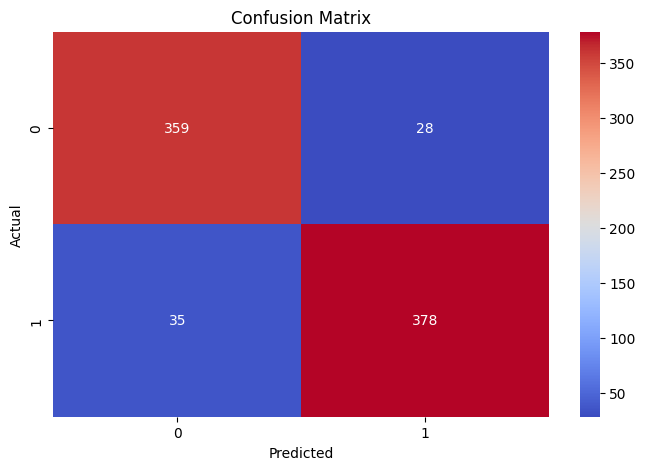

In [26]:
# Parameter grid for SVC
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']}

# Grid search for SVC
svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

# Get the best SVC classifier
best_svm = svm_grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters: {svm_grid_search.best_params_}')

# Predict using the best SVC classifier
y_pred = best_svm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       387
           1       0.93      0.91      0.92       413

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800



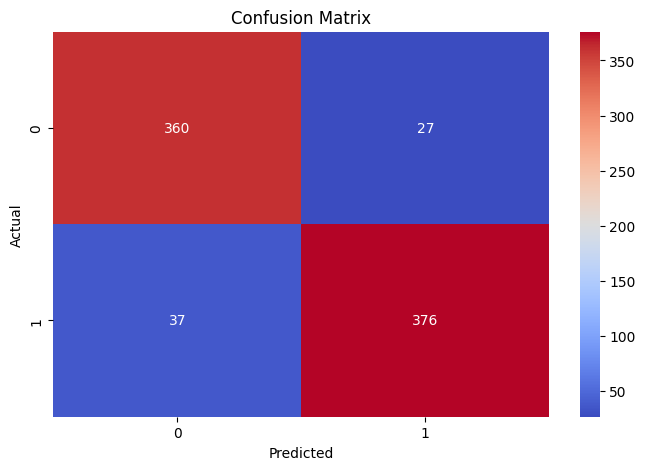

In [27]:
# Bagging Classifier with SVC
# Create a Bagging Classifier with the best SVC classifier
bagging_svm = BaggingClassifier(best_svm, n_estimators=100)
bagging_svm.fit(X_train, y_train)

# Predict using the Bagging Classifier
y_pred = bagging_svm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 4.8 Trees Classifier

Best parameters: {'max_depth': 25, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       387
           1       0.90      0.91      0.90       413

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800



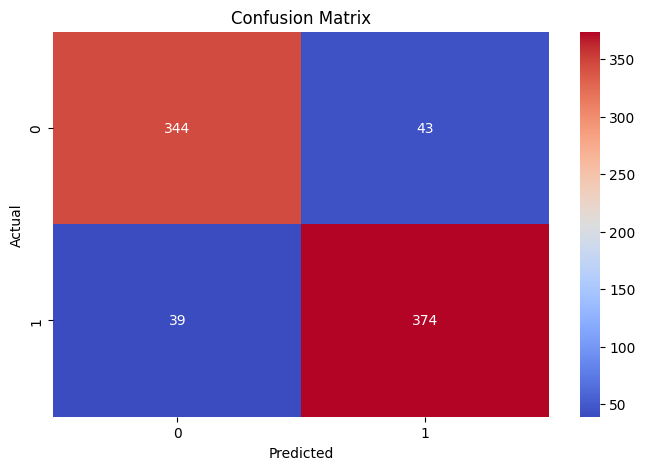

In [28]:
# Extra Trees Classifier

# Parameter grid for Extra Trees
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [15, 20, 25]}

# Grid search for Extra Trees
et_grid_search = GridSearchCV(ExtraTreesClassifier(), param_grid, cv=5)

et_grid_search.fit(X_train, y_train)

# Get the best Extra Trees classifier

best_et = et_grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters: {et_grid_search.best_params_}')

# Predict using the best Extra Trees classifier
y_pred = best_et.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 4.9 Neural Network

Best parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (300,), 'solver': 'adam'}
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       387
           1       0.90      0.89      0.90       413

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800



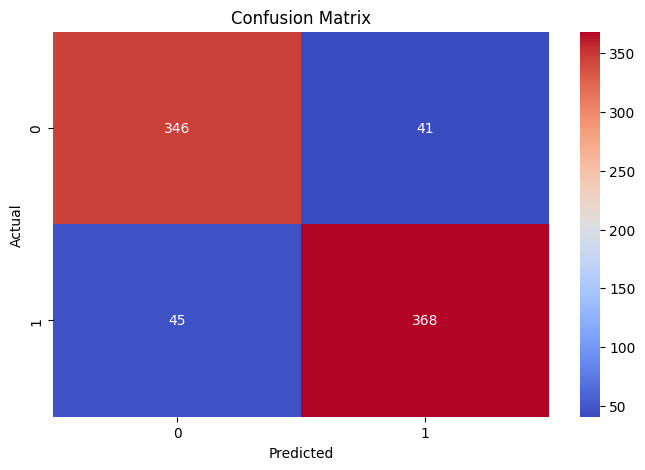

In [29]:
# Create a Neural Network model with early stopping

# Parameter grid for Neural Network
param_grid = {'hidden_layer_sizes': [(100,), (200,), (300,)],
              'activation': ['relu', 'tanh', 'logistic'],
              'solver': ['adam'],
              'alpha': [0.0001, 0.001, 0.01]}

# Grid search for Neural Network
nn_grid_search = GridSearchCV(MLPClassifier(random_state=42, early_stopping=True, n_iter_no_change=5), param_grid, cv=5)

nn_grid_search.fit(X_train, y_train)

# Get the best Neural Network classifier
best_nn = nn_grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters: {nn_grid_search.best_params_}')

# Predict using the best Neural Network classifier
y_pred = best_nn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### 4.10 Logistic Regression

Best parameters: {'C': 0.1, 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       387
           1       0.75      0.77      0.76       413

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



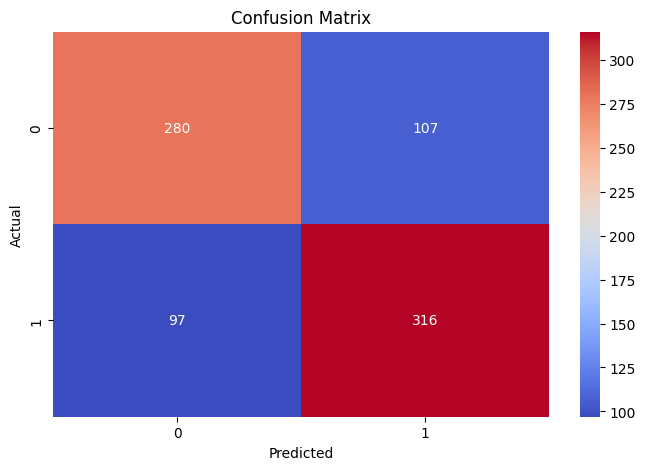

In [30]:
# Logistic Regression

# Parameter grid for Logistic Regression
param_grid = {'C': [0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Grid search for Logistic Regression
lr_grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
lr_grid_search.fit(X_train, y_train)

# Get the best Logistic Regression classifier
best_lr = lr_grid_search.best_estimator_

# Print the best parameters
print(f'Best parameters: {lr_grid_search.best_params_}')

# Predict using the best Logistic Regression classifier
y_pred = best_lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### 4.11 Store accuracy for each model

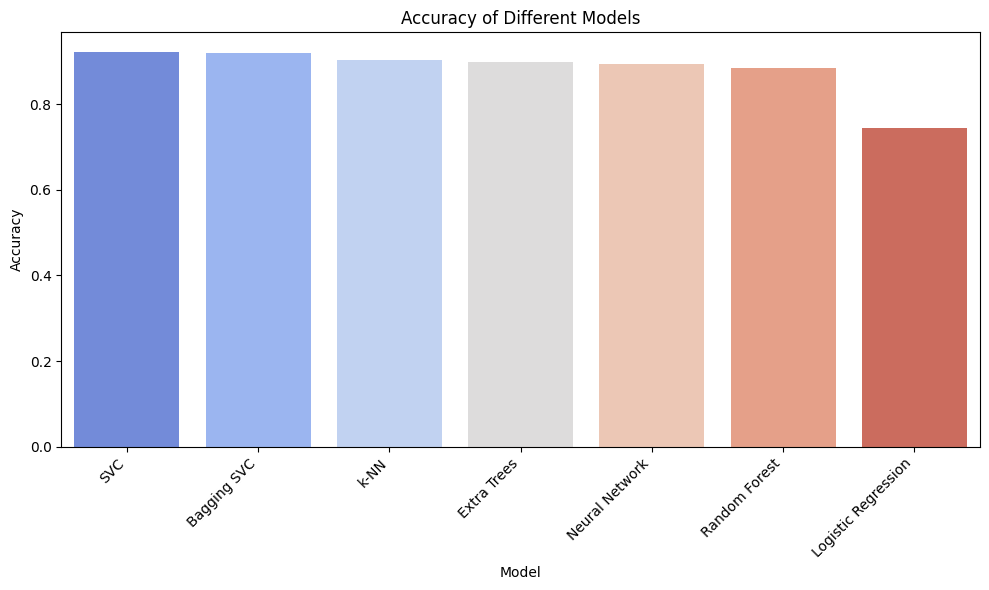

                 Model  Accuracy
2                  SVC   0.92125
3          Bagging SVC   0.92000
0                 k-NN   0.90375
4          Extra Trees   0.89750
5       Neural Network   0.89250
1        Random Forest   0.88500
6  Logistic Regression   0.74500


In [31]:

# Store accuracy scores of each model
accuracy_scores = []

# Evaluate k-NN model
y_pred = best_knn.predict(X_test)
accuracy_scores.append(('k-NN', accuracy_score(y_test, y_pred)))

# Evaluate Random Forest model
y_pred = best_rf.predict(X_test)
accuracy_scores.append(('Random Forest', accuracy_score(y_test, y_pred)))

# Evaluate SVC model
y_pred = best_svm.predict(X_test)
accuracy_scores.append(('SVC', accuracy_score(y_test, y_pred)))

# Evaluate Bagging Classifier with SVC model
y_pred = bagging_svm.predict(X_test)
accuracy_scores.append(('Bagging SVC', accuracy_score(y_test, y_pred)))

# Evaluate Extra Trees Classifier model
y_pred = best_et.predict(X_test)
accuracy_scores.append(('Extra Trees', accuracy_score(y_test, y_pred)))

# Evaluate Neural Network model
y_pred = best_nn.predict(X_test)
accuracy_scores.append(('Neural Network', accuracy_score(y_test, y_pred)))

# Evaluate Logistic Regression model
y_pred = best_lr.predict(X_test)
accuracy_scores.append(('Logistic Regression', accuracy_score(y_test, y_pred)))

# Create a DataFrame from accuracy scores
accuracy_df = pd.DataFrame(accuracy_scores, columns=['Model', 'Accuracy'])

# Sort the DataFrame by accuracy
accuracy_df = accuracy_df.sort_values('Accuracy', ascending=False)

# Plot the accuracy of each model
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, hue='Model', palette='coolwarm')
plt.title('Accuracy of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Print the accuracy of each model
print(accuracy_df)

#### 4.12 ROC curve

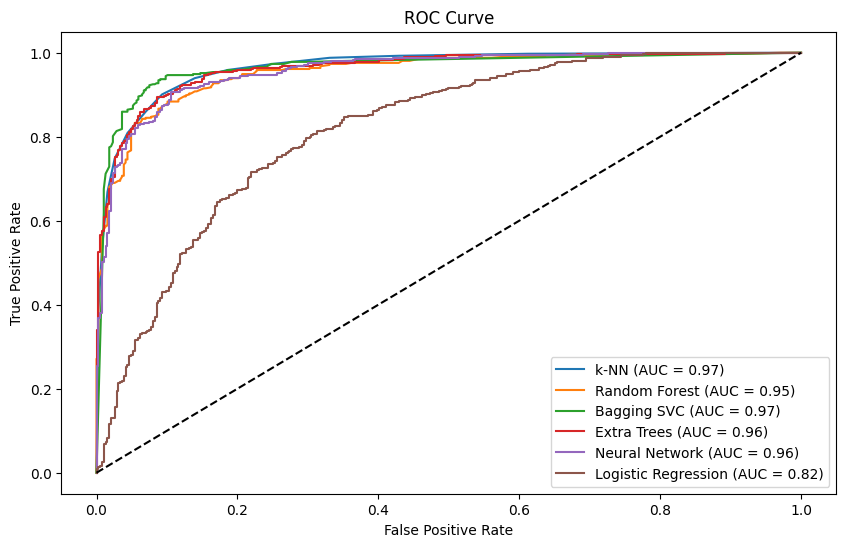

In [32]:
# Show ROC Curve for each model

# Create a list of models
models = [best_knn, best_rf, bagging_svm, best_et, best_nn, best_lr]

# Create a list of model names
model_names = ['k-NN', 'Random Forest', 'Bagging SVC', 'Extra Trees', 'Neural Network', 'Logistic Regression']

# Plot ROC Curve for each model
plt.figure(figsize=(10, 6))
for model, name in zip(models, model_names):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()

### 5. Conclusion

As we can see from the results, the SVC is the best model for this dataset. 

```
Model               Accuracy
SVC                 0.92125
Bagging SVC         0.92000
k-NN                0.90375
Extra Trees         0.89750
Neural Network      0.89250
Random Forest       0.88500
Logistic Regression 0.74500
```

The SVC model has an accuracy of 0.92125, which is the best accuracy among all the models. The ROC curve shows that the SVC model has the best performance among all the models.

But the difference between the SVC model, Bagging SVC model is very small, so we can consider the Bagging SVC model also a good model for this dataset.

